In [1]:
import pandas as pd
import numpy as np
from lsynth import compute_upsilon, generate_syndata
import seaborn as sns

model_path='../datasets/INFB1617.qmodel.gz'
DATA="../datasets/year2016_2017.csv"
#DATA='../datasets/gss_2018.csv'
#model_path="../datasets/gss_2018.joblib"
orig_df=pd.read_csv(DATA,keep_default_na=False, index_col=0)

# Generate synthetic data 

In [2]:
# 1. Generate synthetic data with a chosen generator
df_lsm = generate_syndata(
    num=100,
    model_path=model_path,
    gen_algorithm="LSM",
    n_workers=11,
)

Loading model from ../datasets/INFB1617.qmodel.gz ...
Generating 100 rows via LSM (qsample).


qsample(LSM, threads=11): 100%|███████████████| 100/100 [00:14<00:00,  7.05it/s]


In [3]:
# 1. Generate synthetic data with a chosen generator
df_baseline = generate_syndata(
    num=100,
    gen_algorithm="BASELINE",
    orig_df=orig_df,
    n_workers=11,
)

Generating 100 rows via BASELINE (independent columns).


In [4]:
# 1. Generate synthetic data with a chosen generator
df_ctgan = generate_syndata(
    num=100,
    gen_algorithm="CTGAN",
    orig_df=orig_df.sample(50),
    n_workers=11,
)

Generating 100 rows via CTGAN.


# Compute Upsilon on synthetic dataframes

Loading model from ../datasets/INFB1617.qmodel.gz ...
Computing Upsilon on DataFrame with 100 rows ...


average_fidelity(threads=11): 100%|███████████| 100/100 [00:05<00:00, 18.41it/s]


0.979283125481655


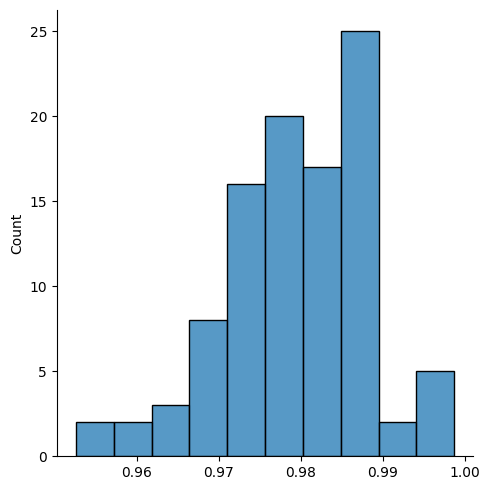

In [5]:
ups_lsm, _ = compute_upsilon(
    df_lsm,
    model_path=model_path,
    n_workers=11,
)
print(np.nanmean(ups_lsm))
sns.displot(ups_lsm)

In [9]:
df_baseline.columns=['x'+str(i) for i in orig_df.columns]

Loading model from ../datasets/INFB1617.qmodel.gz ...
Computing Upsilon on DataFrame with 100 rows ...


average_fidelity(threads=11): 100%|███████████| 100/100 [00:05<00:00, 17.45it/s]


0.9695279077893025


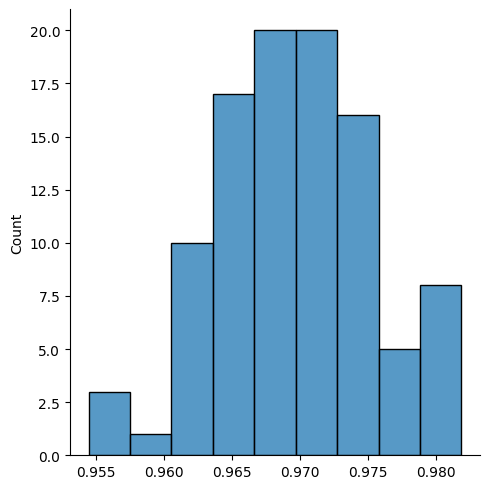

In [10]:
ups_baseline, _ = compute_upsilon(
    df_baseline,
    model_path=model_path,
    n_workers=11,
)
print(np.nanmean(ups_baseline))
sns.displot(ups_baseline)

In [11]:
df_ctgan.columns=['x'+str(i) for i in orig_df.columns]

In [ ]:
ups_ctgan, _ = compute_upsilon(
    df_ctgan,
    model_path=model_path,
    n_workers=11,
)
print(np.nanmean(ups_ctgan))
sns.displot(ups_ctgan)

Loading model from ../datasets/INFB1617.qmodel.gz ...
Computing Upsilon on DataFrame with 100 rows ...


average_fidelity(threads=11):   8%|█            | 8/100 [00:02<00:20,  4.49it/s]

In [ ]:
sns.distplot(ups_baseline)
sns.distplot(ups_ctgan)
sns.distplot(ups_lsm)